# Preprocessing
---
[Alejandro Ciuba](https://alejandrociuba.github.io), alejandrociuba@pitt.edu
---
## Overview
This notebook preprocesses and splits the data into the necessary training, testing and development splits we used for our studies. It accomplishes the following preprocessing steps:
1. Only the majority emotion felt will remain per painting.
2. Only utterances associated with the majorit emotion per painting will remain.
3. Paintings with uniform distribution of emotions should be removed.

It also performs the following actions upon data splitting:
1. Seeds the splits in a 70-10-20; training-dev-testing split schema.
2. Oversamples underrepresented emotions and undersamples overrepresented emotions.
---
## Set-Up
### Necessary Imports

In [46]:
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

### Settings

In [47]:
# Turn this off
%pprint
pd.set_option('display.max_columns', None)

Pretty printing has been turned ON


### Globals

In [48]:
DATA = "../data/art_full.csv"
SEED = 42

---
## Preprocessing

In [49]:
art_df = pd.read_csv(DATA, index_col=False)
art_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454684 entries, 0 to 454683
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   art_style   454684 non-null  object 
 1   painting    454684 non-null  object 
 2   emotion     454684 non-null  object 
 3   utterance   454684 non-null  object 
 4   repetition  454684 non-null  int64  
 5   artist      454684 non-null  object 
 6   year        268063 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 24.3+ MB


In [50]:
# Get the majority emotion per painting and drop uniformly distributed paintings
# TODO: Can I get some confirmation that this is correct?
max_emo_df = art_df.groupby(["painting"], as_index=False).value_counts(subset=["emotion"], sort=True).drop_duplicates(["painting", "count"], keep=False).drop_duplicates(["painting"], keep="first")
max_emo_df

,painting,emotion,count
0,a.y.-jackson_algoma-in-november-1935,fear,4
4,a.y.-jackson_barns-1926,amusement,1
7,a.y.-jackson_early-spring-quebec-1923,sadness,1
8,a.y.-jackson_entrance-to-halifax-harbour-1919,contentment,4
10,a.y.-jackson_first-snow-algoma-country-1920,fear,3
...,...,...,...
269272,zinaida-serebriakova_woman-in-blue-1934,contentment,4
269276,zinaida-serebriakova_work-from-collioure-1930,contentment,1
269277,zinaida-serebriakova_yevgeny-lanceray-in-a-sha...,amusement,3
269280,zinaida-serebriakova_young-breton-1934,contentment,3


In [51]:
# How many unique rows we should have after merging
sum(max_emo_df["count"])

196844

In [52]:
# Approx 9k paintings have a uniform distribution of emotions
len(art_df["painting"].unique())

80031

In [53]:
# Filter by the painting and emotion column
new_df = pd.merge(left=art_df, right=max_emo_df, how="inner", on=["painting", "emotion"])
new_df.head()

,art_style,painting,emotion,utterance,repetition,artist,year,count
0,Abstract_Expressionism,aaron-siskind_per-400-1983,amusement,it looks like there could be a bird walking up...,5,aaron-siskind,1983.0,1
1,Abstract_Expressionism,abidin-dino_saman-sar-s-illustration,amusement,the cheetah print is very mesmerizing and plea...,5,abidin-dino,NaN,2
2,Abstract_Expressionism,abidin-dino_saman-sar-s-illustration,amusement,the painting is playful despite the stark colo...,5,abidin-dino,NaN,2
3,Abstract_Expressionism,alexander-calder_the-dog,amusement,not sure what this represents so its fun to tr...,7,alexander-calder,NaN,4
4,Abstract_Expressionism,alexander-calder_the-dog,amusement,the sculpture looks to be seals with legs and ...,7,alexander-calder,NaN,4


In [54]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196844 entries, 0 to 196843
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   art_style   196844 non-null  object 
 1   painting    196844 non-null  object 
 2   emotion     196844 non-null  object 
 3   utterance   196844 non-null  object 
 4   repetition  196844 non-null  int64  
 5   artist      196844 non-null  object 
 6   year        114631 non-null  float64
 7   count       196844 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 12.0+ MB


---
## Split Creation
We need to make sure splits contain all emotions

In [55]:
train, test = train_test_split(new_df, train_size=0.7, random_state=SEED, shuffle=True)

# Valid vs. Test
valid, test = train_test_split(test, train_size=0.1, random_state=SEED, shuffle=True)

# Sanity check
print(len(train))
print(len(test))
print(len(valid))

# Both splits have all emotions
print(len(train["emotion"].unique()))
print(len(test["emotion"].unique()))
print(len(valid["emotion"].unique()))

137790
53149
5905
9
9
9


In [56]:
train.head(10)

,art_style,painting,emotion,utterance,repetition,artist,year,count
104341,Naive_Art_Primitivism,miriam-schapiro_goncharova-1992,excitement,"the orange background color, and th red on her...",5,miriam-schapiro,1992.0,3
85453,Impressionism,theodor-pallady_debarcader-pe-sena-dinspre-bel...,contentment,the little building has very colorful paint on...,5,theodor-pallady,NaN,3
133149,Post_Impressionism,albert-marquet_notre-dame-in-winter-1902,something else,ominous landscape and structure setting. hard...,6,albert-marquet,1902.0,3
159111,Realism,vincent-van-gogh_peasant-woman-lifting-potatoe...,sadness,this painting gives off old history book vibes...,5,vincent-van-gogh,1885.0,3
151669,Realism,volodymyr-orlovsky_edge-of-a-wood,contentment,the cows seek shade under the large tree.,5,volodymyr-orlovsky,NaN,4
151977,Realism,winslow-homer_on-the-trail,contentment,the colors of autumn leaves accompany the man ...,5,winslow-homer,NaN,2
127724,Post_Impressionism,pyotr-konchalovsky_veranda-essentuki-1948,contentment,a chair on the sunporch as the shine shines th...,5,pyotr-konchalovsky,1948.0,5
103956,Naive_Art_Primitivism,grã©goire-michonze_scene-de-village,disgust,naked women getting kissed and groped by men.,5,grã©goire-michonze,NaN,3
25564,Baroque,rembrandt_tobit-and-anna-1659,sadness,the man is breathing his last breathes as he l...,5,rembrandt,1659.0,4
37800,Early_Renaissance,bartolome-bermejo_piet-of-canon-luis-despl-1490,sadness,there is real sorrow in the woman's face holdi...,6,bartolome-bermejo,1490.0,5


---
## Training Set Sampling

<Axes: xlabel='emotion'>

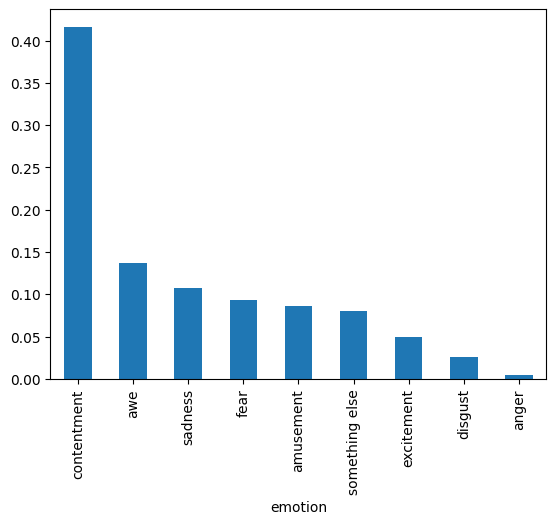

In [57]:
# Distribution of emotions over the training set
train["emotion"].value_counts(normalize=True).plot(kind="bar")

### Possible Solutions
- Randomly undersample the `contentment` class
- Randomly oversample the `something else`, `excitement`, `disgust` and `anger` classes
    - Apply some version of SMOTE on these classes to more advanced classifiers or to their word vector representations
- Potentially remove the `something else` category

In [58]:
# Merge the DataFrames with a split column
train["split"] = "TRAIN"
test["split"] = "TEST"
valid["split"] = "VALID"

final_df = pd.concat([train, test, valid])

final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196844 entries, 104341 to 3332
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   art_style   196844 non-null  object 
 1   painting    196844 non-null  object 
 2   emotion     196844 non-null  object 
 3   utterance   196844 non-null  object 
 4   repetition  196844 non-null  int64  
 5   artist      196844 non-null  object 
 6   year        114631 non-null  float64
 7   count       196844 non-null  int64  
 8   split       196844 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 15.0+ MB


In [59]:
final_df = final_df[["painting", "artist", "art_style", "year", "utterance", "emotion", "repetition", "count", "split"]]
final_df.to_csv("../data/splits.csv", index=False)

---
## Smaller Splits
We are having issues running everything, so we are making smaller splits that keep the same proportions from the main `splits.csv` file.

In [60]:
size = 19_000  # Approximately this lol
small_df = pd.DataFrame(columns=final_df.columns)
counts = train["emotion"].value_counts(normalize=True)

for emotion in final_df.emotion.unique():

    rep = counts[emotion]
    inds = final_df[final_df.emotion == emotion].sample(n=int(size * rep), random_state = SEED).index
    
    small_df = pd.concat([small_df, final_df.iloc[inds, :]])

/tmp/ipykernel_93376/1835710348.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  small_df = pd.concat([small_df, final_df.iloc[inds, :]])


In [61]:
small_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18995 entries, 185886 to 69203
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   painting    18995 non-null  object 
 1   artist      18995 non-null  object 
 2   art_style   18995 non-null  object 
 3   year        11084 non-null  float64
 4   utterance   18995 non-null  object 
 5   emotion     18995 non-null  object 
 6   repetition  18995 non-null  object 
 7   count       18995 non-null  object 
 8   split       18995 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.4+ MB


In [62]:
small_df.sample(10, random_state=SEED)

,painting,artist,art_style,year,utterance,emotion,repetition,count,split
16792,frans-hals_family-group-in-a-landscape-detail,frans-hals,Baroque,NaN,"they are both thinking this ""coming to america...",amusement,5,3,TRAIN
31370,fernand-leger_three-sisters-1952,fernand-leger,Cubism,1952.0,this is a very awkward group. they remind me o...,amusement,5,2,TRAIN
149482,theodore-rousseau_cows-in-the-mare-1855,theodore-rousseau,Realism,1855.0,"i really liked the scenery that was painted, t...",contentment,5,4,TRAIN
164699,thomas-gainsborough_wooded-landscape-with-a-wa...,thomas-gainsborough,Rococo,NaN,the warm colors and slow vibe to the movement ...,contentment,5,4,TRAIN
101631,natalia-goncharova_woodcutters,natalia-goncharova,Naive_Art_Primitivism,NaN,the blend of reds and the facial features of t...,anger,10,3,TRAIN
126325,paul-cezanne_dark-blue-vase-1880,paul-cezanne,Post_Impressionism,1880.0,the rose in the center is blooming and its a h...,contentment,5,2,TEST
121020,edouard-vuillard_chateau-of-fontainebleau-1919,edouard-vuillard,Post_Impressionism,1919.0,the mirror image on the water gives the water ...,contentment,5,3,TRAIN
33642,francis-picabia_ballerina-on-an-ocean-liner-1913,francis-picabia,Cubism,1913.0,i feel disgusted because this is highly disorg...,disgust,5,1,TEST
161420,maurice-quentin-de-la-tour_jean-paris-de-montm...,maurice-quentin-de-la-tour,Rococo,NaN,this gentleman appears to be colonial administ...,amusement,5,2,TRAIN
116998,evelyne-axell_marine-1971,evelyne-axell,Pop_Art,1971.0,"i feel weird while looking at this, like the w...",something else,6,3,TRAIN


In [63]:
train_small, test_small = train_test_split(small_df, train_size=0.7, random_state=SEED, shuffle=True)

# Valid vs. Test
valid_small, test_small = train_test_split(test_small, train_size=0.1, random_state=SEED, shuffle=True)

# Sanity check
print(len(train_small))
print(len(test_small))
print(len(valid_small))

# Both splits have all emotions
print(len(train_small["emotion"].unique()))
print(len(test_small["emotion"].unique()))
print(len(valid_small["emotion"].unique()))

13296
5130
569
9
9
9


In [64]:
train_small.head(10)

,painting,artist,art_style,year,utterance,emotion,repetition,count,split
169358,karl-bodmer_inside-front-cover-left,karl-bodmer,Romanticism,NaN,various native american artifacts cause a desi...,awe,5,2,TRAIN
185786,nicholas-roerich_mongolian-yurtas-1936,nicholas-roerich,Symbolism,1936.0,the neutral colors in this makes it feel calm ...,awe,5,2,TEST
162239,hubert-robert_a-hermit-praying-in-the-ruins-of...,hubert-robert,Rococo,1760.0,"the piece has many small details, and i would ...",awe,6,4,TEST
186317,arnold-bã¶cklin_idyll-1866,arnold-bã¶cklin,Symbolism,1866.0,i love the bodies and how beautifully painted ...,contentment,5,3,TRAIN
181511,gustave-dore_st-peter-and-st-john-at-beautiful...,gustave-dore,Romanticism,NaN,this drawing of ancient biblical days bring ab...,sadness,6,4,TRAIN
111201,albrecht-durer_christ-at-the-cross-1497,albrecht-durer,Northern_Renaissance,1497.0,the man crucified in the picture is dead.,sadness,5,3,TRAIN
60087,abdullah-suriosubroto_paddy-field,abdullah-suriosubroto,Impressionism,NaN,beautiful tropical scene..what java must have ...,awe,7,4,TEST
67746,camille-pissarro_the-diligence-1877,camille-pissarro,Impressionism,1877.0,the reds and oranges of the trees are of a bea...,contentment,6,4,TRAIN
11270,lawren-harris_aftermath-of-storm-lake-superior...,lawren-harris,Art_Nouveau_Modern,1926.0,it looks like a rainbow on a mostly sunny day ...,contentment,5,2,TRAIN
188030,nicholas-roerich_and-we-not-afraid-1922,nicholas-roerich,Symbolism,1922.0,i like this peaceful picture of mountain cover...,contentment,6,3,TRAIN


---
### Training Set Subsampling

<Axes: xlabel='emotion'>

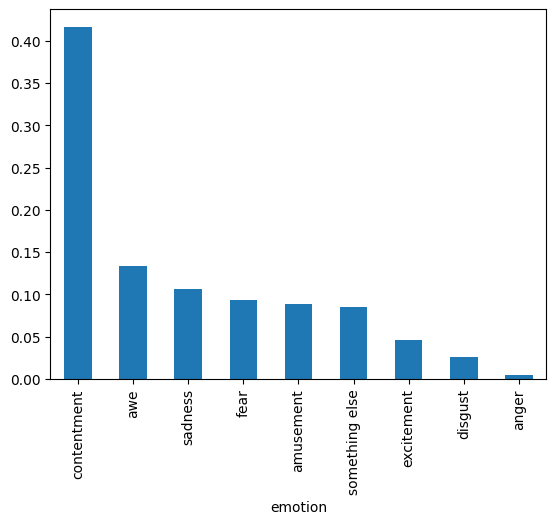

In [65]:
# Distribution of emotions over the training set
train_small["emotion"].value_counts(normalize=True).plot(kind="bar")

In [66]:
# Merge the DataFrames with a split column
train_small["split"] = "TRAIN"
test_small["split"] = "TEST"
valid_small["split"] = "VALID"

final2_df = pd.concat([train_small, test_small, valid_small])

final2_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18995 entries, 169358 to 32986
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   painting    18995 non-null  object 
 1   artist      18995 non-null  object 
 2   art_style   18995 non-null  object 
 3   year        11084 non-null  float64
 4   utterance   18995 non-null  object 
 5   emotion     18995 non-null  object 
 6   repetition  18995 non-null  object 
 7   count       18995 non-null  object 
 8   split       18995 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.4+ MB


In [67]:
len(final2_df.painting.unique())

16575

In [68]:
# Reorganize to have painting as the key column
final2_df = final2_df[["painting", "artist", "art_style", "year", "utterance", "emotion", "repetition", "count", "split"]]
final2_df.to_csv("../data/small-splits.csv", index=False)